In [9]:
import pandas as pd

df=pd.read_excel("feature_engineering.xlsx")

Question 1. What is the association between immunization coverage ( HepB, Polio, Measles) and infant mortality?


Hypotheses 1: Higher immunization rates for HepB, Polio, and Measles are linked with lower infant mortality rates. If this is correct it means that vaccination given in the 1st one year to a baby are protecting them against the respective diseases.

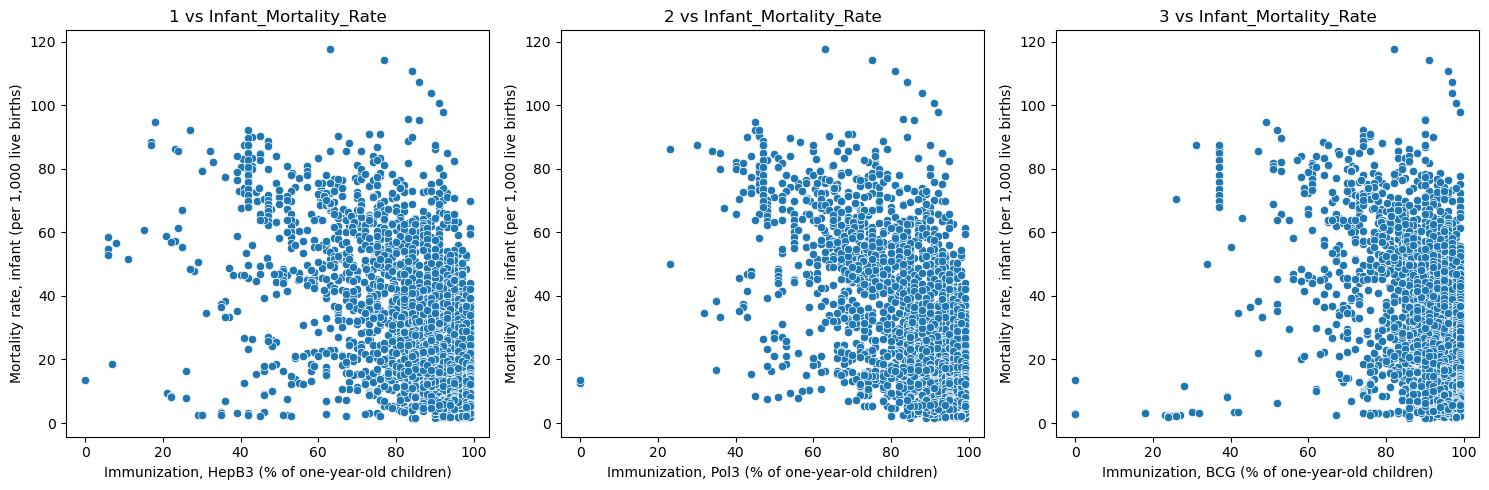

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns
All_3 = df[['Immunization, HepB3 (% of one-year-old children)', 'Immunization, BCG (% of one-year-old children)',
           'Immunization, Pol3 (% of one-year-old children)', 'Mortality rate, infant (per 1,000 live births)']]

# Drop rows with missing values
data = data.dropna()
# Scatter plots
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Immunization, HepB3 (% of one-year-old children)', 
                         'Immunization, Pol3 (% of one-year-old children)', 
                         'Immunization, BCG (% of one-year-old children)']):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=data[col], y=data['Mortality rate, infant (per 1,000 live births)'])
    plt.title(f'{i+1} vs Infant_Mortality_Rate')
plt.tight_layout()
plt.show()


Inference:
Plot 1: Group of data points with high HepB3 immunization rates(above 80%) and low infant mortality rates(below 40deaths per 1,000 live births).

Plot 2: Similar to HepB3, group of data points with higher Polio immunization rates(above 80%) tend to have lower infant mortality rates, while those with lower immunization rates (below 40%) show a wide spread of infant mortality rates.

Plot 3: For BCG higher immunization rates (above 80%) resulting in lower infant mortality. But for regions with lower BCG coverage (below 60%), there is discrepency in mortality rates.

Conclusion: Over all from 3 plots we can see that higher immunization rates indicate lower mortality rate. HEnce vaccination helps infants from getting infected with diseases.

Hypothesis 2: Regoins with higher immunization records will tend to have lower infant mortality rate?

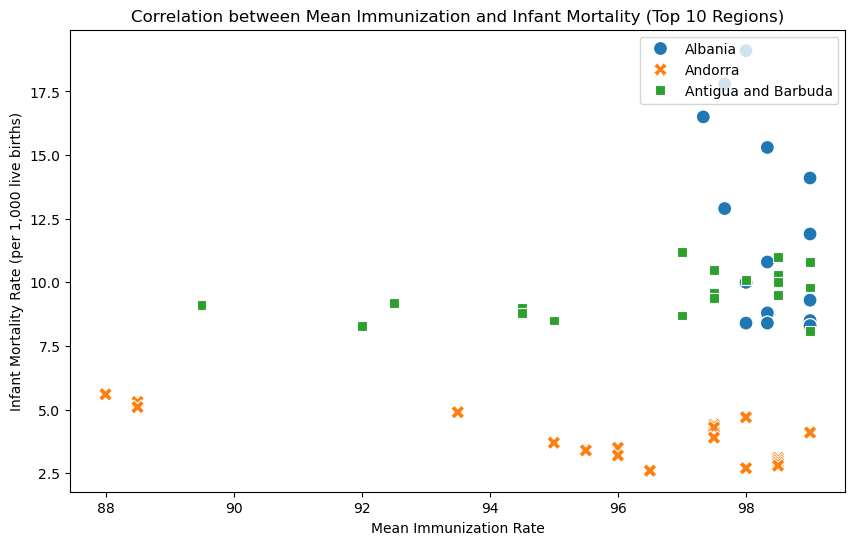

,Mean_Immunization,"Mortality rate, infant (per 1,000 live births)"
Mean_Immunization,1.000000,0.214832
"Mortality rate, infant (per 1,000 live births)",0.214832,1.000000


In [114]:
# First, let's calculate the mean of 'Immunization, HepB3', 'Immunization, BCG', and 'Immunization, Pol3' for the top 10 regions
df['Mean_Immunization'] = df[['Immunization, HepB3 (% of one-year-old children)', 
                              'Immunization, BCG (% of one-year-old children)', 
                              'Immunization, Pol3 (% of one-year-old children)']].mean(axis=1)

# Select top 10 regions by 'Mean_Immunization'
top_10_regions = df.nlargest(10, 'Mean_Immunization')['Region Name']

# Filter the dataset to include only these top 10 regions
df_top_10_mean_immun = df[df['Region Name'].isin(top_10_regions)]

# Calculate correlation between 'Mean Immunization' and 'Mortality rate, infant (per 1,000 live births)'
correlation = df_top_10_mean_immun[['Mean_Immunization', 'Mortality rate, infant (per 1,000 live births)']].corr()

# Plot the relationship between 'Mean Immunization' and 'Mortality rate, infant' for these regions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_10_mean_immun, x='Mean_Immunization', y='Mortality rate, infant (per 1,000 live births)', hue='Region Name', style='Region Name', s=100)
plt.title('Correlation between Mean Immunization and Infant Mortality (Top 10 Regions)')
plt.xlabel('Mean Immunization Rate')
plt.ylabel('Infant Mortality Rate (per 1,000 live births)')
plt.legend(loc='upper right')
plt.show()

# Display correlation value
correlation


Inference : Plot shows correlation between the Mean of 3 Immunization Rate(which includes HepB3, BCG, and Pol3 immunizations) and the Infant Mortality Rate(per 1,000 live births) for top 10 regions with the highest mean-immunization. Correlation is 0.2 which is low which indicates that hypothesis is not completely correct and there might be other factors along with immunization if we consider regoins like health care facilities and other regional factors. 

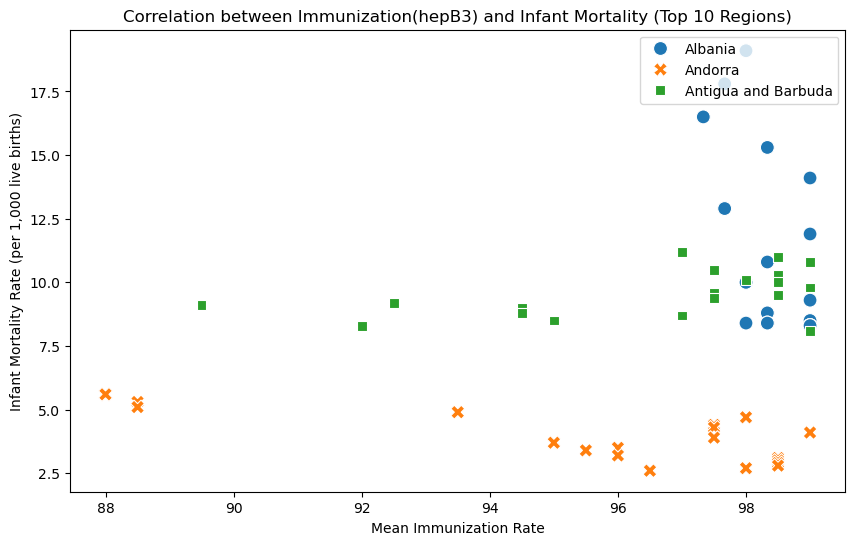

,Mean_Immunization,"Mortality rate, infant (per 1,000 live births)"
Mean_Immunization,1.000000,-0.494737
"Mortality rate, infant (per 1,000 live births)",-0.494737,1.000000


In [110]:
# First, let's calculate the mean of 'Immunization, HepB3', 'Immunization, BCG', and 'Immunization, Pol3' for the top 10 regions
df['Immunization'] = df[['Immunization, HepB3 (% of one-year-old children)']] 
                    

# Select top 10 regions by 'Mean_Immunization'
mean = df.nlargest(10, 'Immunization')['Region Name']

# Filter the dataset to include only these top 10 regions
mean = df[df['Region Name'].isin(mean)]

# Calculate correlation between 'Mean Immunization' and 'Mortality rate, infant (per 1,000 live births)'
correlation = mean[['Mean_Immunization', 'Mortality rate, infant (per 1,000 live births)']].corr()

# Plot the relationship between 'Mean Immunization' and 'Mortality rate, infant' for these regions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top_10_mean_immun, x='Mean_Immunization', y='Mortality rate, infant (per 1,000 live births)', hue='Region Name', style='Region Name', s=100)
plt.title('Correlation between Immunization(hepB3) and Infant Mortality (Top 10 Regions)')
plt.xlabel('Mean Immunization Rate')
plt.ylabel('Infant Mortality Rate (per 1,000 live births)')
plt.legend(loc='upper right')
plt.show()

# Display correlation value
correlation


Question 2:How does low birth weight correlate outcomes in infants health and infant mortality? 

Hypothesis 1: Compared to normal birth weight, low birth weight is linked to a higher risk of infant mortality.

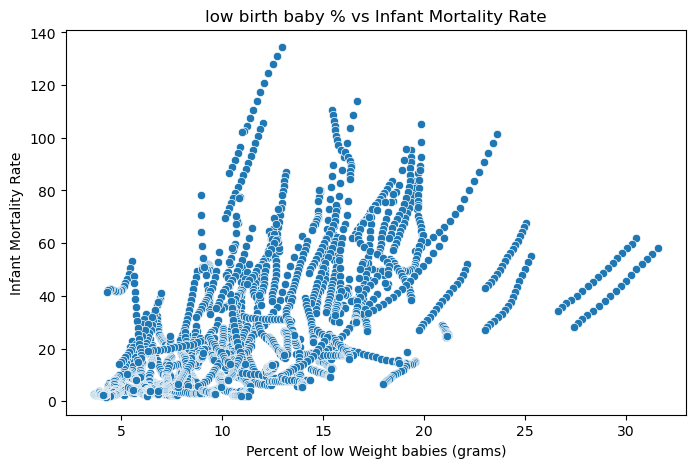

In [66]:
# Scatter plot for Birth Weight vs Infant Mortality
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Low-birthweight babies (% of births)'], y=df['Mortality rate, infant, male (per 1,000 live births)'])
plt.title('low birth baby % vs Infant Mortality Rate')
plt.xlabel('Percent of low Weight babies (grams)')
plt.ylabel('Infant Mortality Rate')
plt.show()


Inference: From graph we can see that as percentage of low weight is increasing there is a reasonable increase in the infant mortality rate. So we can say that babies with optimal birth weigh are at less risk.

Hypothesis 2: Is there any correlation between babies with lower weight and attendents taking care of the baby? 

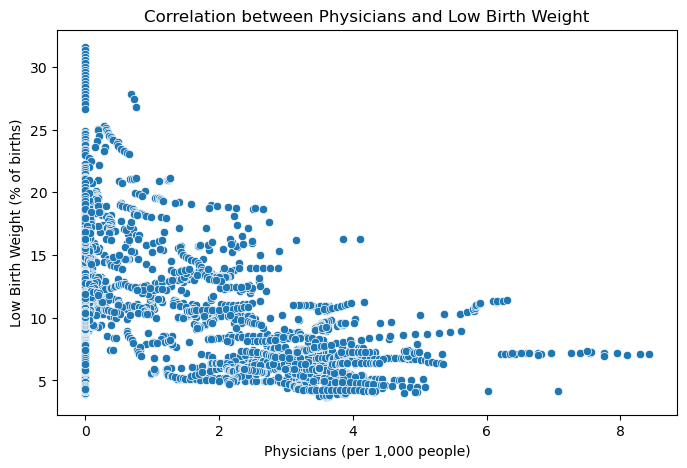

,"Physicians (per 1,000 people)",Low-birthweight babies (% of births)
"Physicians (per 1,000 people)",1.000000,-0.480231
Low-birthweight babies (% of births),-0.480231,1.000000


In [68]:
# Let's calculate the correlation between "Physicians (per 1,000 people)" and "Low Birth Weight Percentage" (or similar columns related to birth weight)
# First, we'll identify the relevant column for birth weight in the dataset

# Calculate correlation between 'Physicians (per 1,000 people)' and 'Low-birthweight babies (% of births)'
correlation_physicians_lowbw = df[['Physicians (per 1,000 people)', 'Low-birthweight babies (% of births)']].corr()

# Plot a scatter plot to visualize the relationship between 'Physicians (per 1,000 people)' and 'Low-birthweight babies (% of births)'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Physicians (per 1,000 people)', y='Low-birthweight babies (% of births)', data=df)
plt.title('Correlation between Physicians and Low Birth Weight')
plt.xlabel('Physicians (per 1,000 people)')
plt.ylabel('Low Birth Weight (% of births)')
plt.show()

# Display the correlation value
correlation_physicians_lowbw


Inference: Plot shows correlation between the number of Physicians(per 1,000 people) and the percentage of Low-birthweight babies(% of births) in various regions. The correlation is negative indicating that more number of physicians are assigned towards babies with less weight as they need more medical care.